# The Sparks Foundation

Data Science and Bussiness Analytics intern

Name:-Gaurav Pandey

Problem statements:

● As a sports analysts, find out the most successful teams, players and factors
                    contributing win or loss of a team.
                    
● Suggest teams or players a company should endorse for its products.

In [2]:
import io
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("dataset/deliveries.csv")

In [4]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
df.shape

(179078, 21)

In [10]:
df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


# Basic Analysis of the data
Basic Analysis of the data to know the basic features of the data and to know that do we need to clean it or not

In [46]:
print('Data Present of no of matches:-',len(set(df['match_id'])))

Data Present of no of matches:- 756


In [47]:
print('Max number of innings in a match:-',max(df['inning']))

Max number of innings in a match:- 5


In [64]:
print(f"no of teams:-{len(df['batting_team'].unique())} \nand names are:- {df['batting_team'].unique()}")

no of teams:-15 
and names are:- ['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']


In [14]:
print("The Maximum over played in a match is",max(df['over']))

The Maximum over played in a match is 20


**maximum balls and minmum balls**

In [17]:
print(f"The minimum balls are {min(df['ball'])} and the maximum balls are {max(df['ball'])}")

The minimum balls are 1 and the maximum balls are 9


So we can see that the maximum balls are 9 and it should be 6 It may be due to no ball or white ball if it is not then we have to clean the data Let's see in which matchs we get the balls greater than 9 

**matches with more than 6 balls**

In [20]:
match_with_more_balls=df[df['ball']>6]
match_with_more_balls

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
13,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
80,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,7,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
111,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,7,DJ Hooda,Yuvraj Singh,A Choudhary,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
112,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,8,DJ Hooda,Yuvraj Singh,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178893,11415,1,Mumbai Indians,Chennai Super Kings,10,7,Ishan Kishan,AS Yadav,DJ Bravo,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178990,11415,2,Chennai Super Kings,Mumbai Indians,6,7,SR Watson,SK Raina,SL Malinga,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178997,11415,2,Chennai Super Kings,Mumbai Indians,7,7,SR Watson,SK Raina,MJ McClenaghan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179010,11415,2,Chennai Super Kings,Mumbai Indians,9,7,SR Watson,SK Raina,MJ McClenaghan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [72]:
len(match_with_more_balls['match_id'].unique())

754

So,In 754 matches we get more than 6 balls means 99% of matches have more than 6 balls in a match

In [76]:
#Let's know why it is happning by printing some examples
df[(df['match_id']==1) & (df['inning']==1) & (df['over']==1) ][['match_id', 'inning', 'over', 'ball',
        'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs']]

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,1,1,0,0,0,0,0,0,0,0,0
1,1,1,1,2,0,0,0,0,0,0,0,0,0
2,1,1,1,3,0,0,0,0,0,0,4,0,4
3,1,1,1,4,0,0,0,0,0,0,0,0,0
4,1,1,1,5,0,2,0,0,0,0,0,2,2
5,1,1,1,6,0,0,0,0,0,0,0,0,0
6,1,1,1,7,0,0,0,1,0,0,0,1,1


In [73]:
df[(df['match_id']==11415) & (df['inning']==2) & (df['over']==6) ][['match_id', 'inning', 'over', 'ball',
        'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs']]

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
178984,11415,2,6,1,0,0,0,0,0,0,0,0,0
178985,11415,2,6,2,0,0,0,0,0,0,4,0,4
178986,11415,2,6,3,0,0,0,0,0,0,0,0,0
178987,11415,2,6,4,0,0,0,0,0,0,6,0,6
178988,11415,2,6,5,0,1,0,0,0,0,1,1,2
178989,11415,2,6,6,0,0,0,0,0,0,4,0,4
178990,11415,2,6,7,0,0,0,0,0,0,0,0,0


In [75]:
df[(df['match_id']==1) & (df['inning']==1) & (df['over']==18) ][['match_id', 'inning', 'over', 'ball',
        'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs']]

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
105,1,1,18,1,0,0,0,0,0,0,6,0,6
106,1,1,18,2,0,0,0,0,0,0,1,0,1
107,1,1,18,3,0,1,0,0,0,0,0,1,1
108,1,1,18,4,0,1,0,0,0,0,0,1,1
109,1,1,18,5,0,0,0,0,0,0,4,0,4
110,1,1,18,6,0,0,0,0,0,0,1,0,1
111,1,1,18,7,0,0,0,0,0,0,2,0,2
112,1,1,18,8,0,0,0,0,0,0,1,0,1


Here we cam see that the sometimes due to wide balls or no balls the no. of balls are higher than usual

# bowler Analysis
    Now We will do some Analysis of bowlers to know their performance

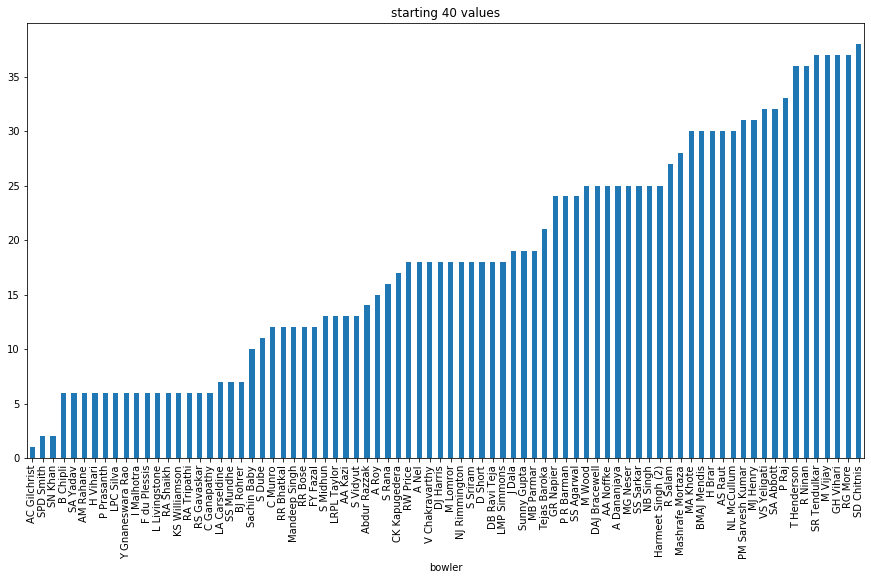

In [156]:
#match played by a bowler
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df.groupby(['bowler'])['match_id'].count().sort_values().head(80).plot.bar(ax=ax,title='starting 40 values')
# df.groupby(['bowler'])['match_id'].count().sort_values().tail(40).plot.bar(ax=ax[1],title='last 40 values')

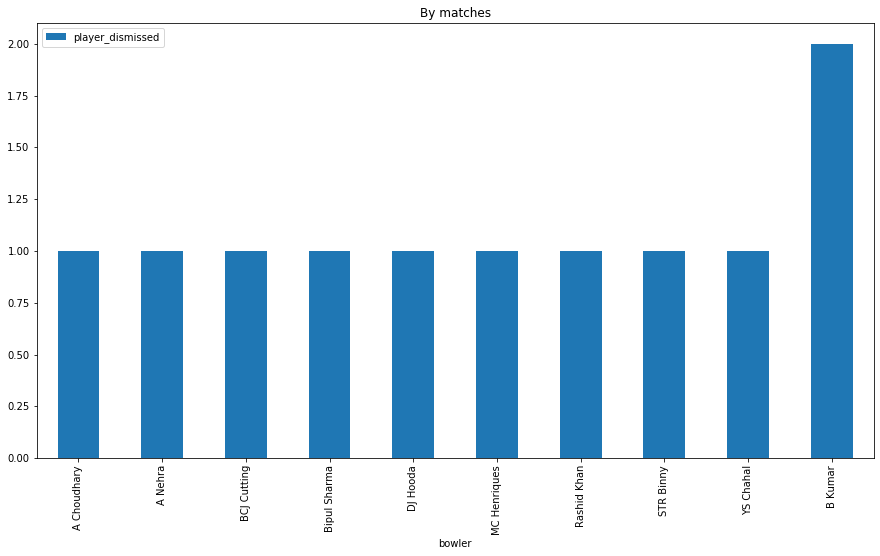

In [257]:
#player dissmissed by a bowler in a match
wickets=df.dropna()
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
wickets.groupby(['match_id','bowler'])['player_dismissed'].count().reset_index().sort_values(['match_id','player_dismissed']).set_index(['match_id','bowler']).loc[1,:].plot.bar(ax=ax,title="By matches")

Wicket is very imp to win the match

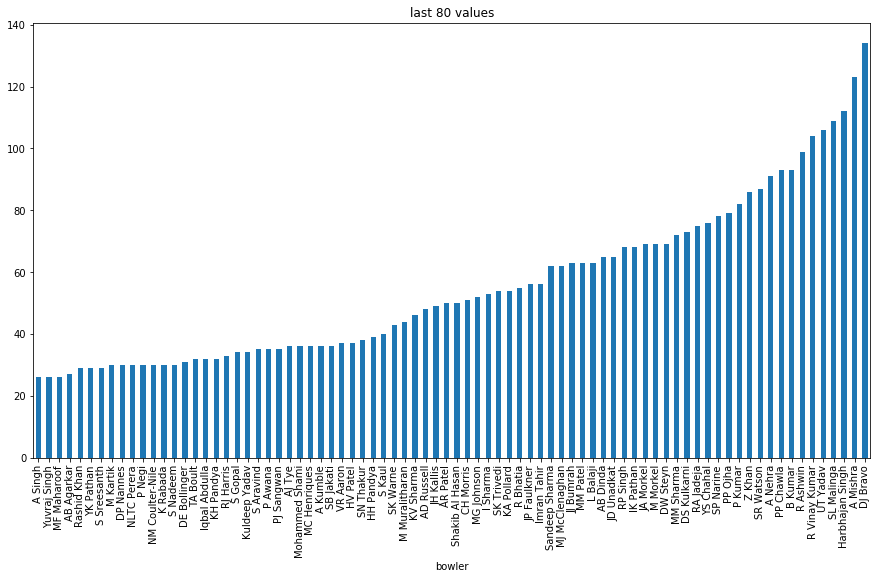

In [259]:
# how much player dismissed by a bowler
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# df.groupby(['bowler'])['noball_runs'].sum().sort_values().head(80).plot.bar(ax=ax,title='starting 80 values')
wickets.groupby(['bowler'])['player_dismissed'].count().sort_values().tail(80).plot.bar(ax=ax,title='last 80 values')

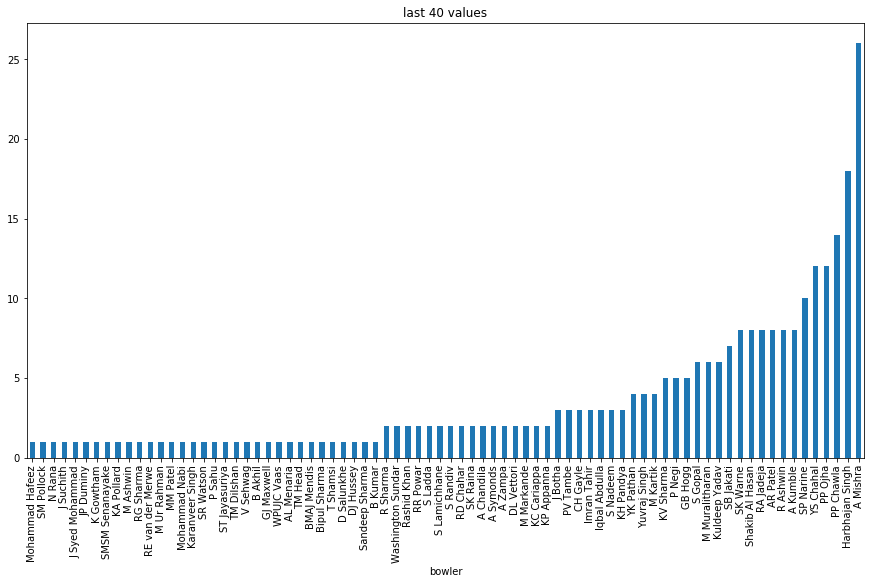

In [261]:
# how much player dismissed by a bowler at stumped
stumped=df[(df['dismissal_kind']=='stumped')]
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# stumped.groupby(['bowler'])['dismissal_kind'].count().sort_values().head(80).plot.bar(ax=ax,title='starting 80 values')
stumped.groupby(['bowler'])['dismissal_kind'].count().sort_values().plot.bar(ax=ax,title='last 40 values')

***More the No balls More Free Hits And More Chances for opposite team to get runs***

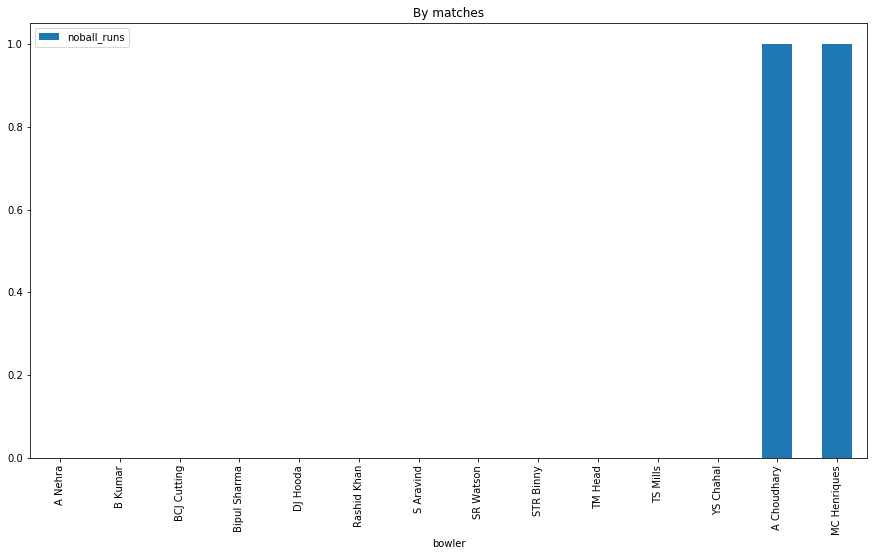

In [189]:
#no balls runs given by a bowler in match
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df.groupby(['match_id','bowler'])['noball_runs'].sum().reset_index().sort_values(['match_id','noball_runs']).set_index(['match_id','bowler']).loc[1,:].plot.bar(ax=ax,title="By matches")
#change the value of loc[_,:] to see the data of different matches 

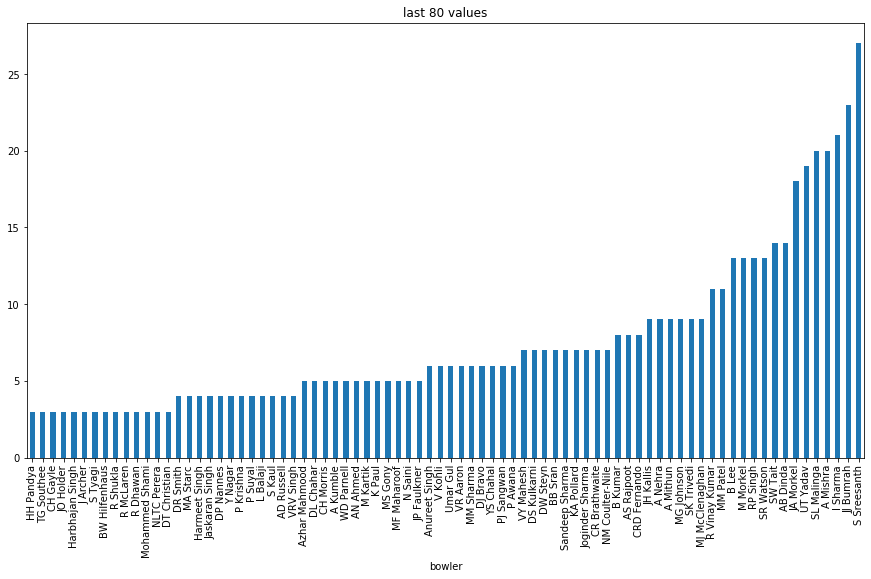

In [190]:
#no balls runs given by a bowler
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# df.groupby(['bowler'])['noball_runs'].sum().sort_values().head(80).plot.bar(ax=ax,title='starting 80 values')
df.groupby(['bowler'])['noball_runs'].sum().sort_values().tail(80).plot.bar(ax=ax,title='last 80 values')

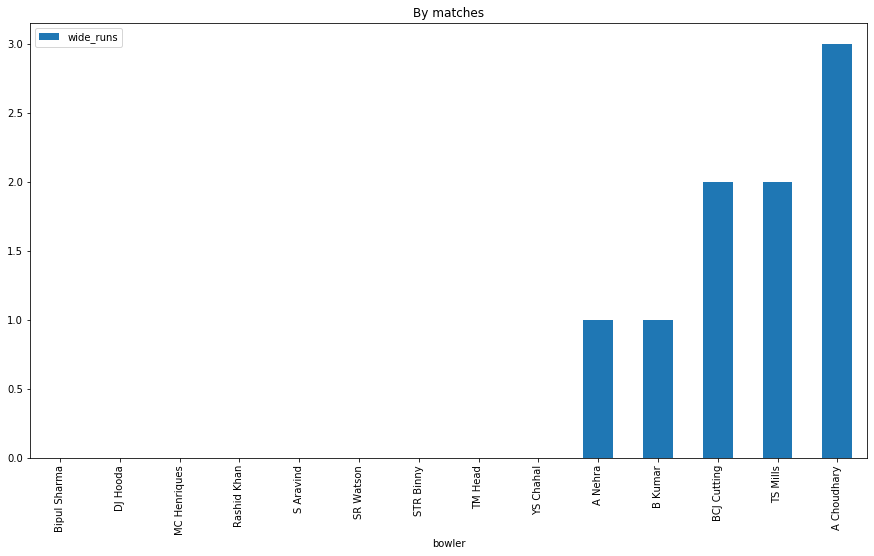

In [191]:
#wide balls runs given by a bowler in a match
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df.groupby(['match_id','bowler'])['wide_runs'].sum().reset_index().sort_values(['match_id','wide_runs']).set_index(['match_id','bowler']).loc[1,:].plot.bar(ax=ax,title="By matches")
#change the value of loc[_,:] to see the data of different matches 

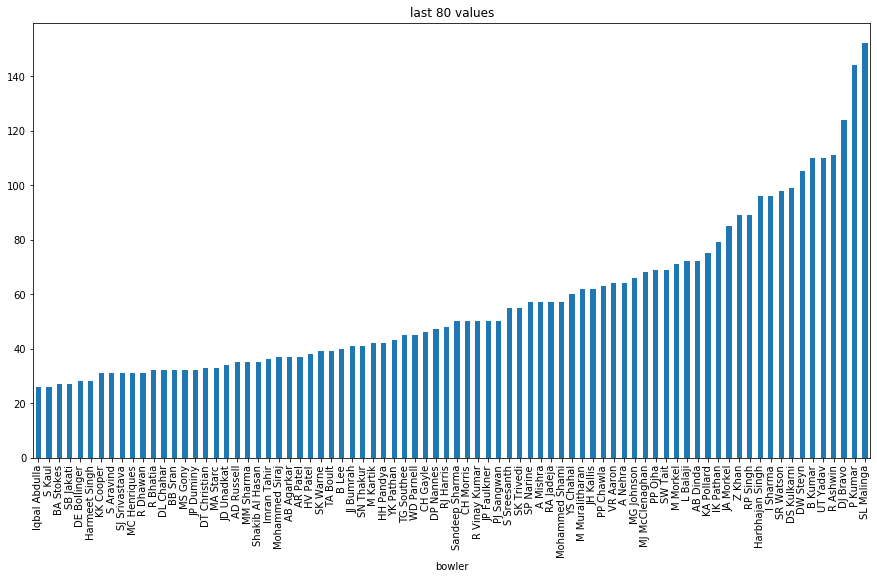

In [192]:
#wide balls runs given by a bowler
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# df.groupby(['bowler'])['wide_runs'].sum().sort_values().head(80).plot.bar(ax=ax,title='starting 80 values')
df.groupby(['bowler'])['wide_runs'].sum().sort_values().tail(80).plot.bar(ax=ax,title='last 80 values')

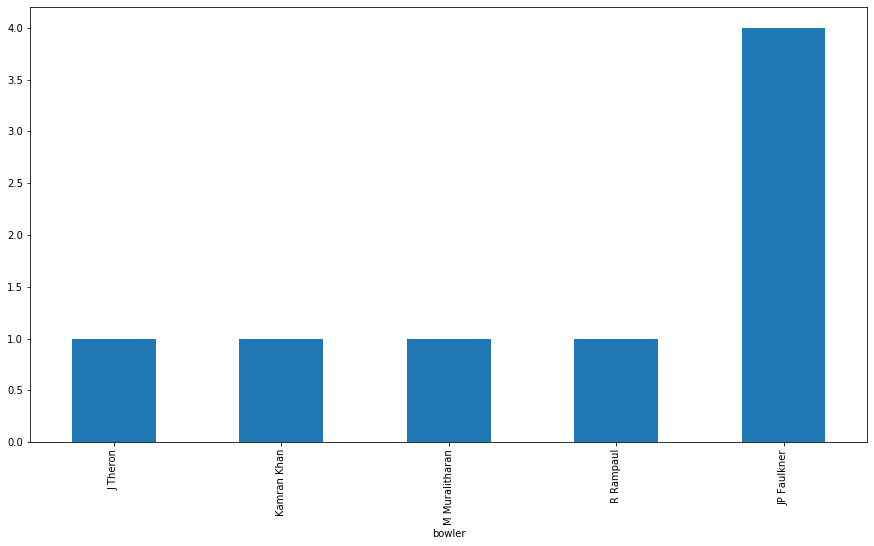

In [264]:
#wicket in super over in match
superover=df[df['is_super_over']==1]
superover.dropna(inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
superover.groupby(['bowler'])['player_dismissed'].count().sort_values().plot.bar(ax=ax)

Wicket is very neccessary in super over

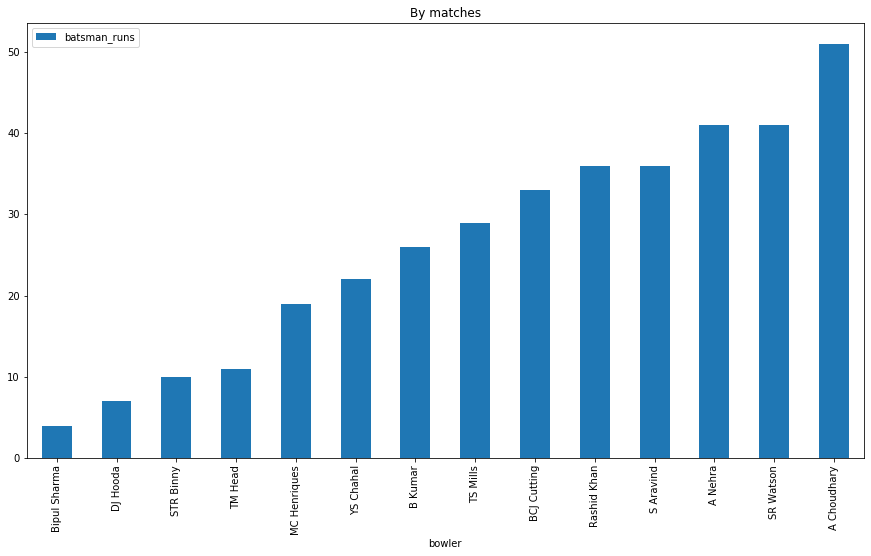

In [188]:
#batsman run given by a bowler in a match
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df.groupby(['match_id','bowler'])['batsman_runs'].sum().reset_index().sort_values(['match_id','batsman_runs']).set_index(['match_id','bowler']).loc[1,:].plot.bar(ax=ax,title="By matches")
#change the value of loc[_,:] to see the data of different matches 

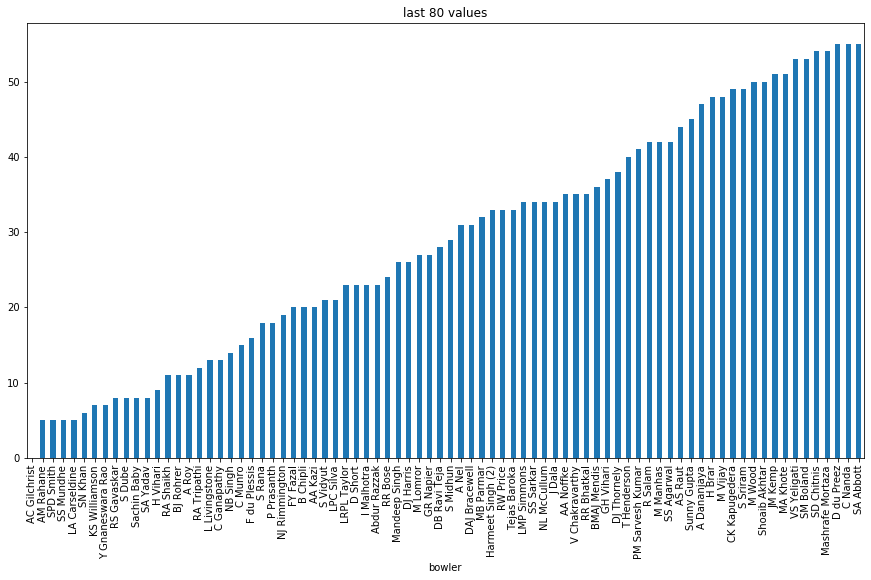

In [33]:
#batsman run given by a bowler
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# df.groupby(['bowler'])['batsman_runs'].sum().sort_values().tail(80).plot.bar(ax=ax,title='starting 80 values')
df.groupby(['bowler'])['batsman_runs'].sum().sort_values().head(80).plot.bar(ax=ax,title='last 80 values')

good bowlers are on your left

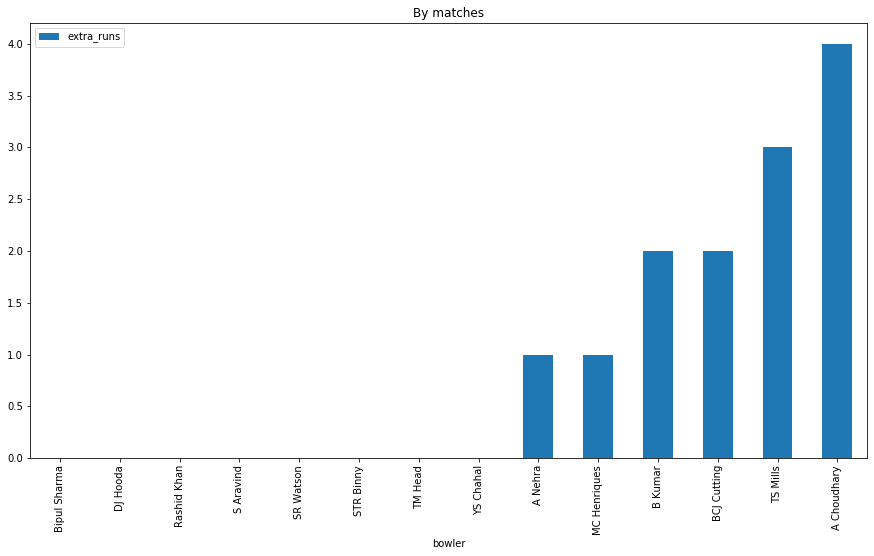

In [187]:
#total extra runs given by a bowler in a match
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df.groupby(['match_id','bowler'])['extra_runs'].sum().reset_index().sort_values(['match_id','extra_runs']).set_index(['match_id','bowler']).loc[1,:].plot.bar(ax=ax,title="By matches")
#change the value of loc[_,:] to see the data of different matches 

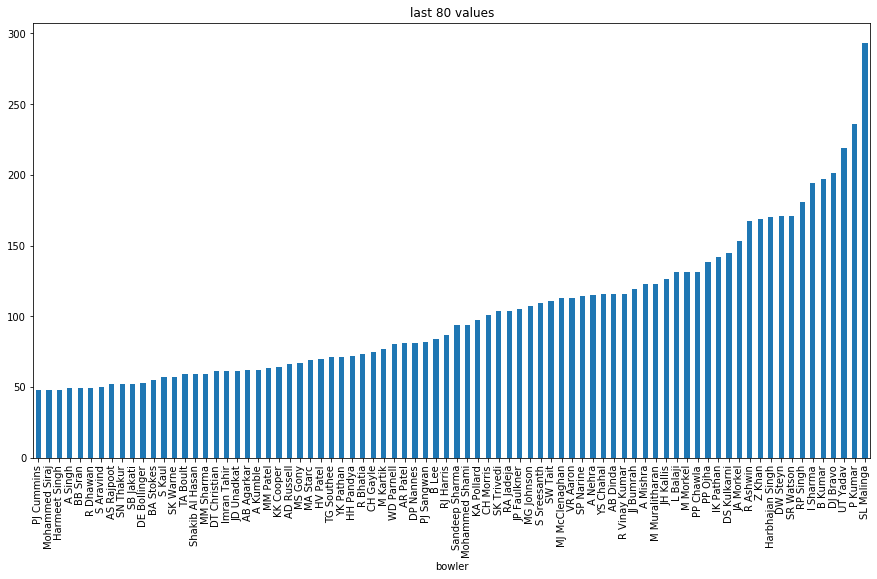

In [184]:
#total extra runs given by a bowler
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# df.groupby(['bowler'])['extra_runs'].sum().sort_values().head(80).plot.bar(ax=ax,title='starting 80 values')
df.groupby(['bowler'])['extra_runs'].sum().sort_values().tail(80).plot.bar(ax=ax,title='last 80 values')

more extra runs : more worst bowler

less extra runs : good bowler

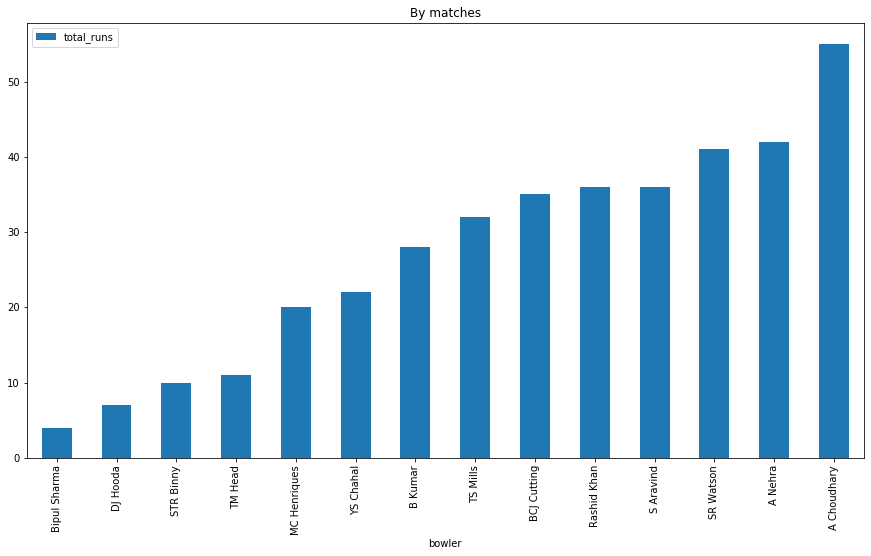

In [32]:
#Total runs given by a bowler in a match
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df.groupby(['match_id','bowler'])['total_runs'].sum().reset_index().sort_values(['match_id','total_runs']).set_index(['match_id','bowler']).loc[1,:].plot.bar(ax=ax,title="By matches")
#change the value of loc[_,:] to see the data of different matches 

we can see the performance in per match here like good performer in match:
    1- bhipul
    2- R Bhatia
    3- P kumar etc..

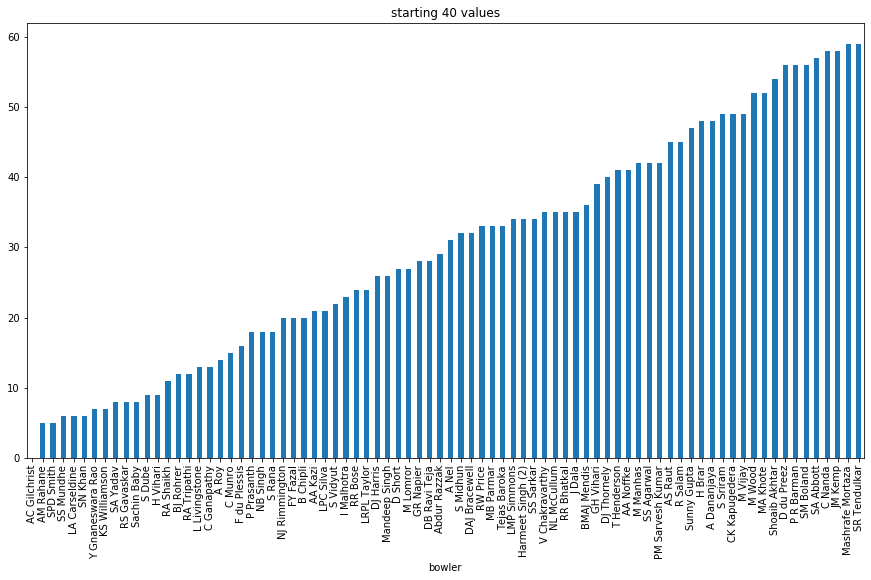

In [158]:
#Total runs given by a bowler
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df.groupby(['bowler'])['total_runs'].sum().sort_values().head(80).plot.bar(ax=ax,title='starting 40 values')
# df.groupby(['bowler'])['total_runs'].sum().sort_values().tail(40).plot.bar(ax=ax[1],title='last 40 values')

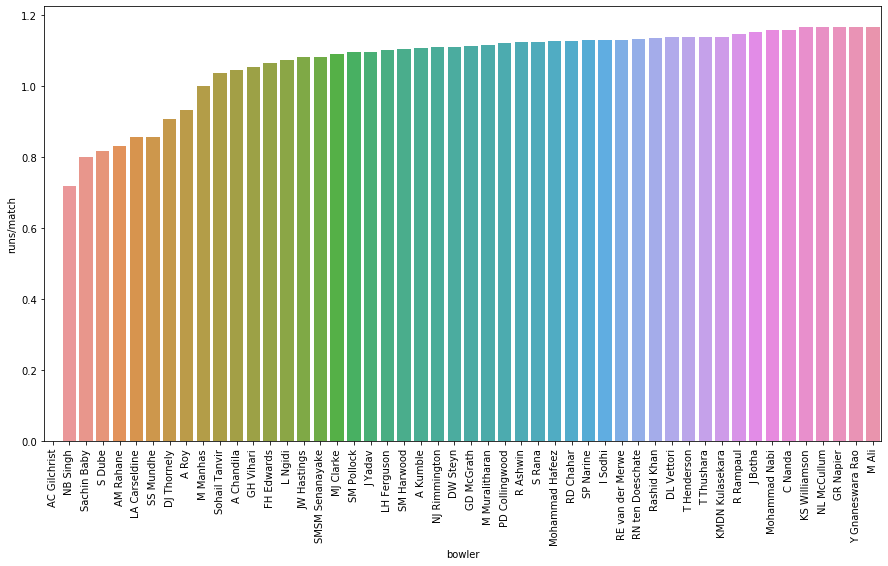

In [29]:
# runs/matches by a bowler
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
runs=df.groupby(['bowler'])['total_runs'].sum()
match=df.groupby(['bowler'])['ball'].count()
runs_match=pd.merge(runs, match, left_index=True, right_index=True)
runs_match['runs/match']=runs_match['total_runs']/runs_match['ball']
runs_match.reset_index(inplace=True)
runs_match
plt.xticks(rotation=90)
sns.barplot(ax=ax,x="bowler", y="runs/match", data=runs_match.sort_values('runs/match').head(50))

Starting 50 Peoples gives very less runs per match than others but not first it has performed in only in one match so we can't say much about this player bowling

Solution:

The players who gives very low runs and take more wickets are the good bowlers

# Batsman Analysis

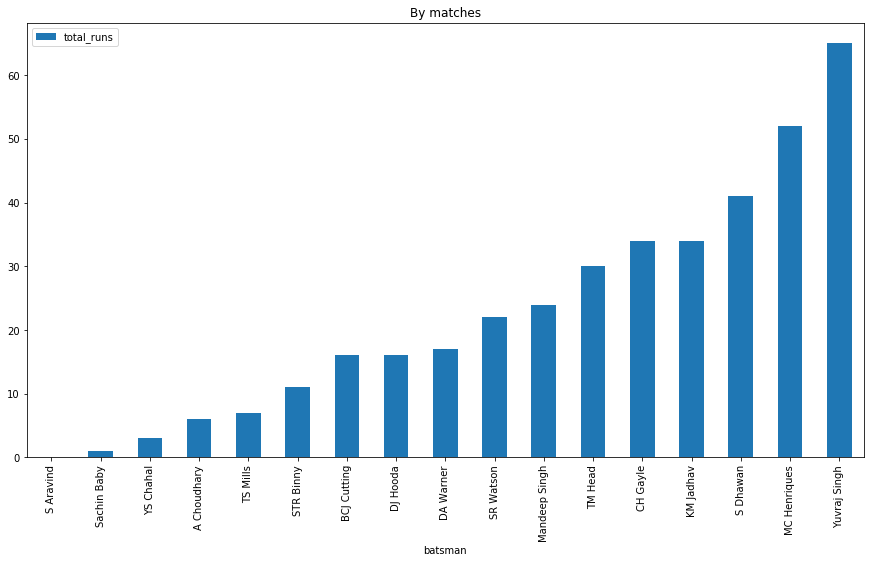

In [7]:
#max total runs gather by batsman in a match
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df.groupby(['match_id','batsman'])['total_runs'].sum().reset_index().sort_values(['match_id','total_runs']).set_index(['match_id','batsman']).loc[1,:].plot.bar(ax=ax,title="By matches")
#change the value of loc[_,:] to see the data of different matches 

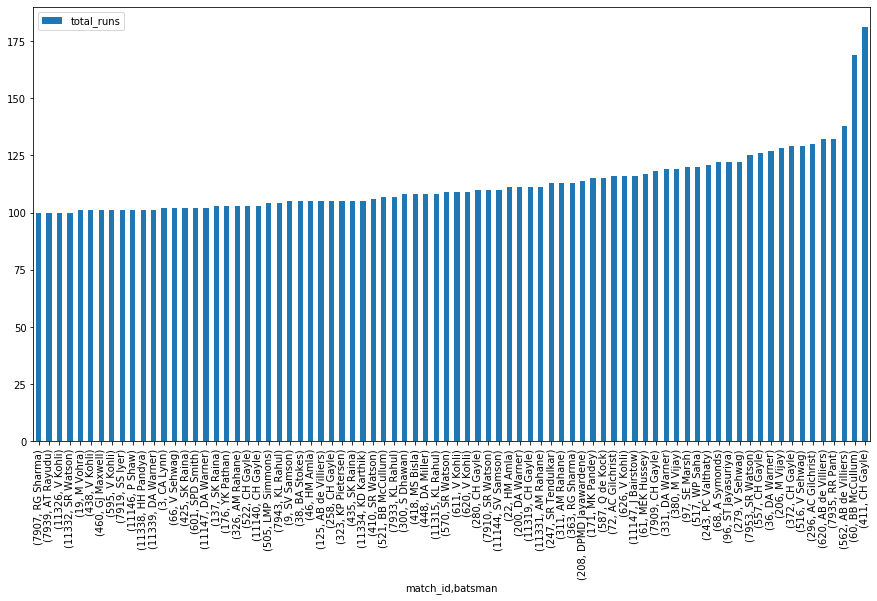

In [23]:
#players who are in the field for long time
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
running=df.groupby(['match_id','batsman'])['total_runs'].sum().reset_index()
running[running['total_runs']>90].set_index(['match_id','batsman']).sort_values(['total_runs','match_id']).tail(80).plot.bar(ax=ax)

These are the player in diffrent matches who are the reasons of winning the match in most of the time 'They all have 90+ runs'

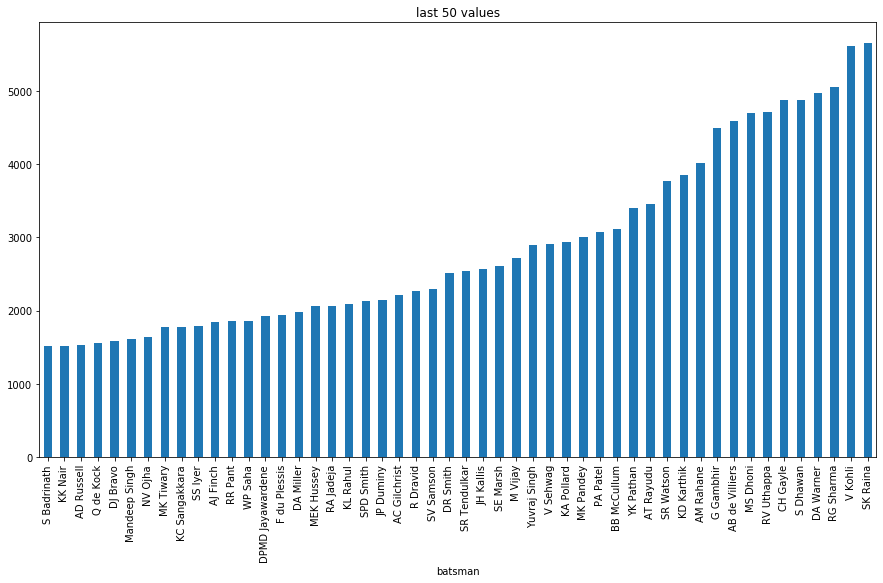

In [9]:
#max total runs gather by batsman
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# df.groupby(['batsman'])['total_runs'].sum().sort_values().head(80).plot.bar(ax=ax,title='starting 80 values')
df.groupby(['batsman'])['total_runs'].sum().sort_values().tail(50).plot.bar(ax=ax,title='last 50 values')

The Players shown above are the 50 players who have highest run in all the matches. 

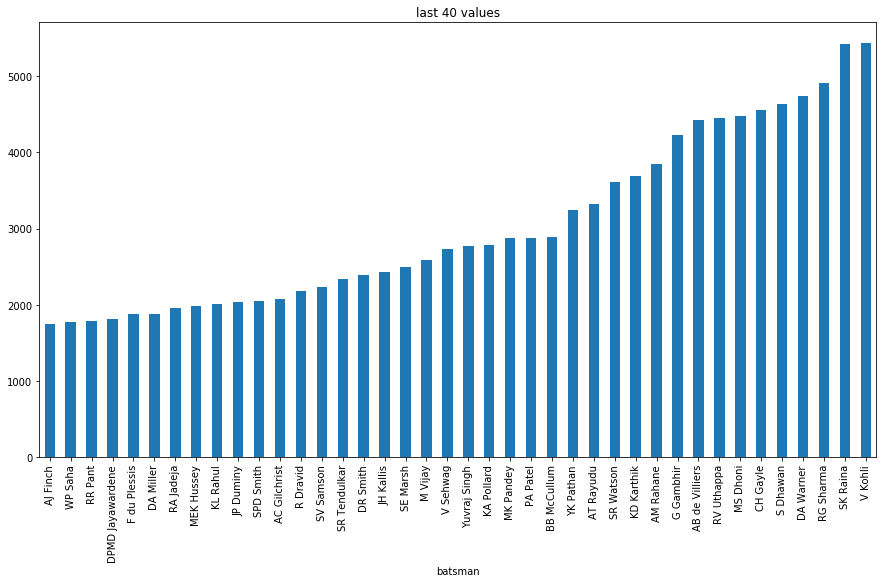

In [196]:
#max batsman runs gather by batsman 
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# df.groupby(['batsman'])['batsman_runs'].sum().sort_values().head(80).plot.bar(ax=ax,title='starting 80 values')
df.groupby(['batsman'])['batsman_runs'].sum().sort_values().tail(40).plot.bar(ax=ax,title='last 40 values')

without including extra runs the players take the runs by himself(depends on their skills not on their fortune)

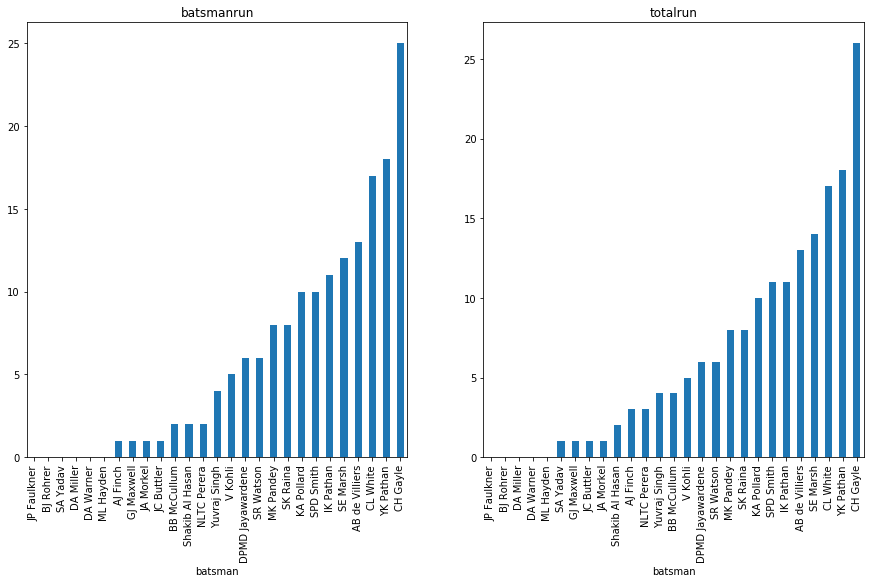

In [204]:
#max runs they get in the super over
superover=df[df['is_super_over']==1]
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
superover.groupby(['batsman'])['batsman_runs'].sum().sort_values().plot.bar(ax=ax[0],title='batsmanrun')
superover.groupby(['batsman'])['total_runs'].sum().sort_values().plot.bar(ax=ax[1],title='totalrun')

players who Played well in super over to get their team winning

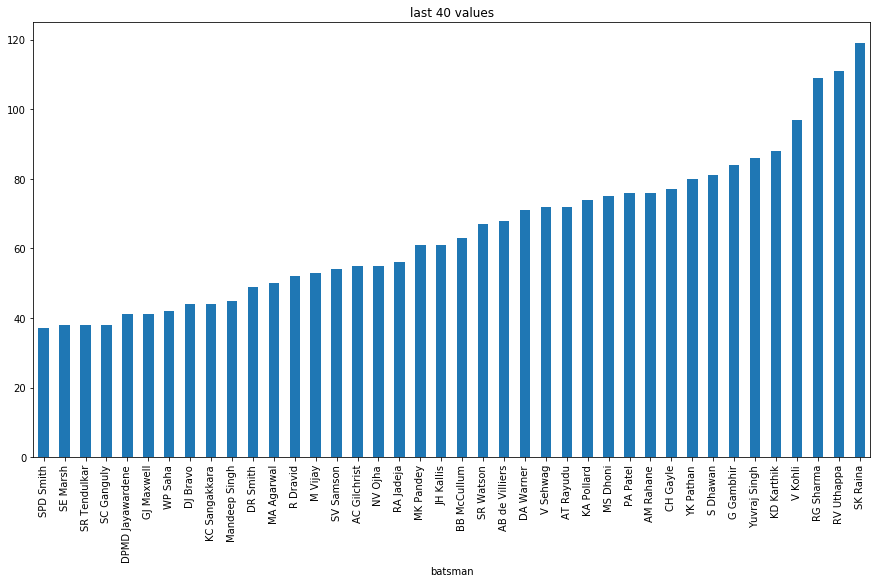

In [25]:
#how many time a player out by catch
catchout=df[(df['dismissal_kind']=='caught') | (df['dismissal_kind']=='caught and bowled')]
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# catchout.groupby(['batsman'])['dismissal_kind'].count().sort_values().head(80).plot.bar(ax=ax,title='starting 80 values')
catchout.groupby(['batsman'])['dismissal_kind'].count().sort_values().tail(40).plot.bar(ax=ax,title='last 40 values')

Players who is out by either good balling or their own irresponsibility

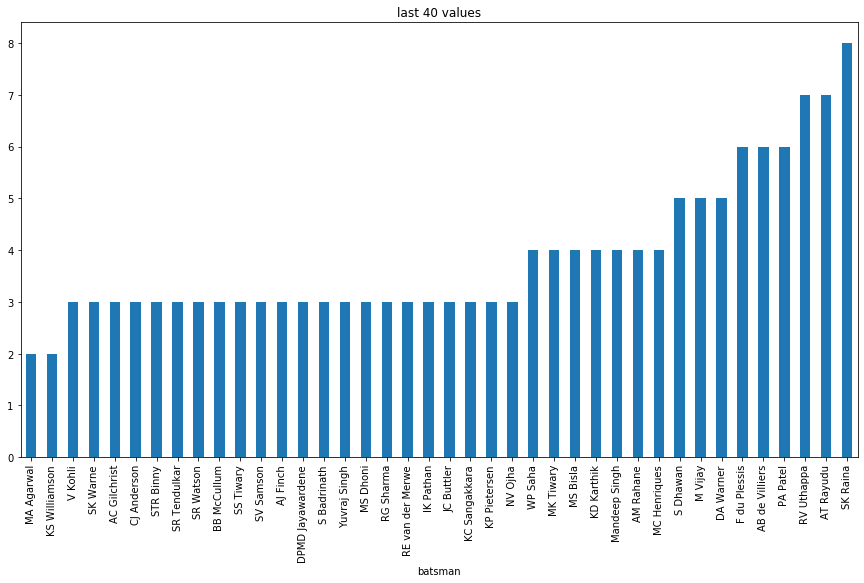

In [222]:
#how many time a player out by stumped in all matches
stumped=df[(df['dismissal_kind']=='stumped')]
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# stumped.groupby(['batsman'])['dismissal_kind'].count().sort_values().head(80).plot.bar(ax=ax,title='starting 80 values')
stumped.groupby(['batsman'])['dismissal_kind'].count().sort_values().tail(40).plot.bar(ax=ax,title='last 40 values')

Players who sometimes are not very focoused or not a good batsman or out by their irresponsibility

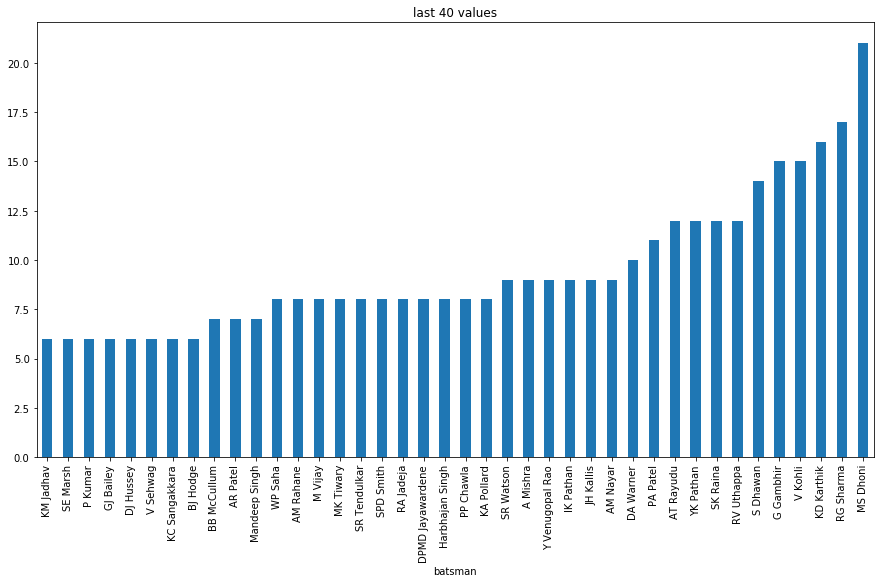

In [233]:
#how many time a player out by run out in all matches
run=df[(df['dismissal_kind']=='run out')]
run.head()
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# run.groupby(['batsman'])['dismissal_kind'].count().sort_values().head(80).plot.bar(ax=ax,title='starting 80 values')
run.groupby(['batsman'])['dismissal_kind'].count().sort_values().tail(40).plot.bar(ax=ax,title='last 40 values')

Players who got carried away while running

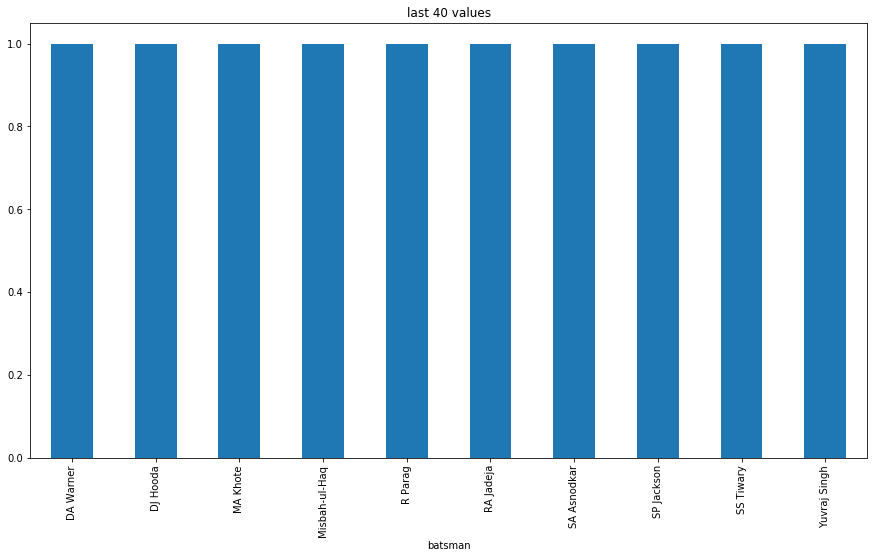

In [226]:
#how many time a player out by hit wicket in all matches
hit=df[(df['dismissal_kind']=='hit wicket') | (df['dismissal_kind']=='hit wicket')]
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# hit.groupby(['batsman'])['dismissal_kind'].count().sort_values().head(80).plot.bar(ax=ax,title='starting 80 values')
hit.groupby(['batsman'])['dismissal_kind'].count().sort_values().plot.bar(ax=ax)

Solution:

We should have to consider many factors while deciding the good players but the players who has better runs and is focused and perform well in super overs and do not easily give his wicket are the good players like ms-dhoni,raina,kholi,ab de villers and many more.

# Teams Analysis

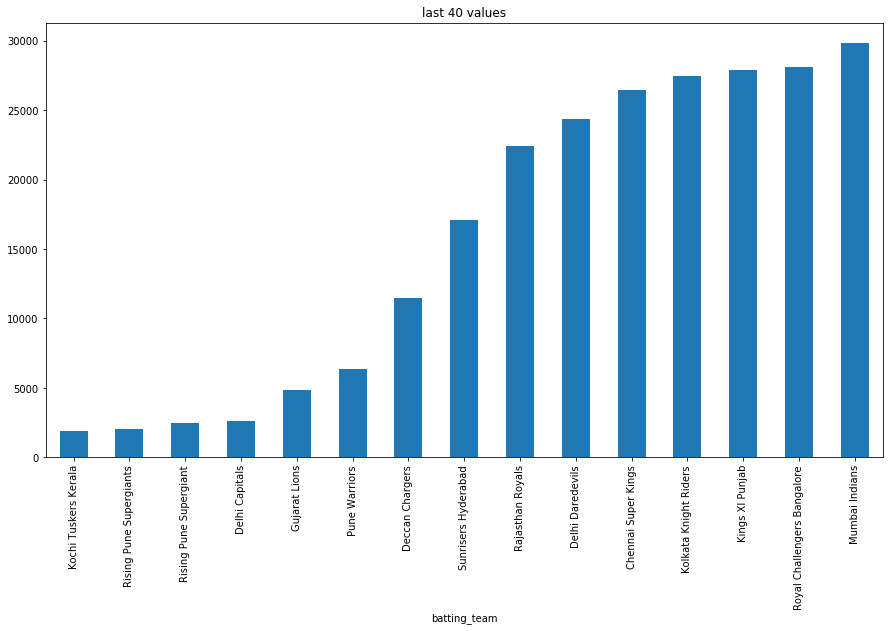

In [238]:
#max runs gathered by a team in all matches4
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df.groupby(['batting_team'])['total_runs'].sum().sort_values().plot.bar(ax=ax)

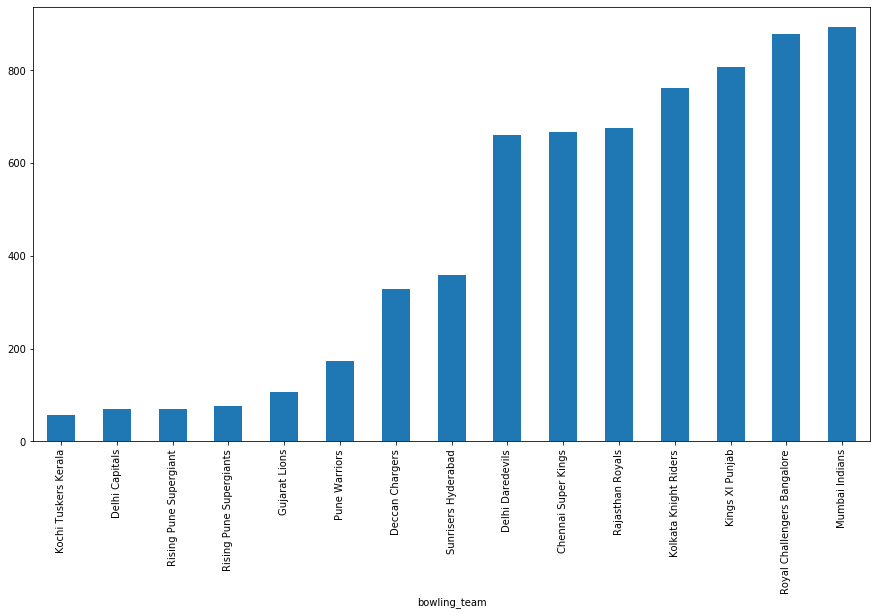

In [247]:
#max wide run given by a team
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df.groupby(['bowling_team'])['wide_runs'].sum().sort_values().plot.bar(ax=ax)

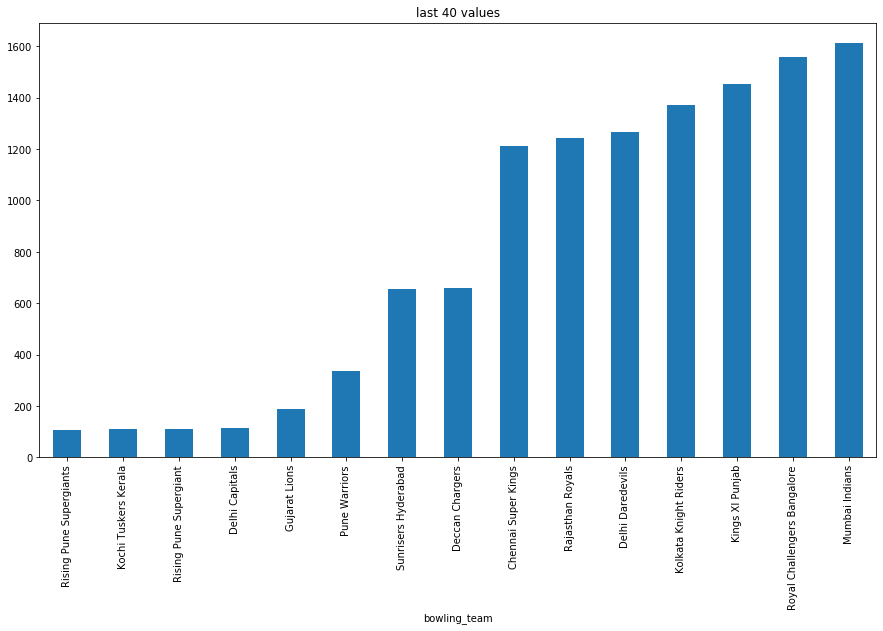

In [253]:
#max extra runs given by a team
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df.groupby(['bowling_team'])['extra_runs'].sum().sort_values().plot.bar(ax=ax)

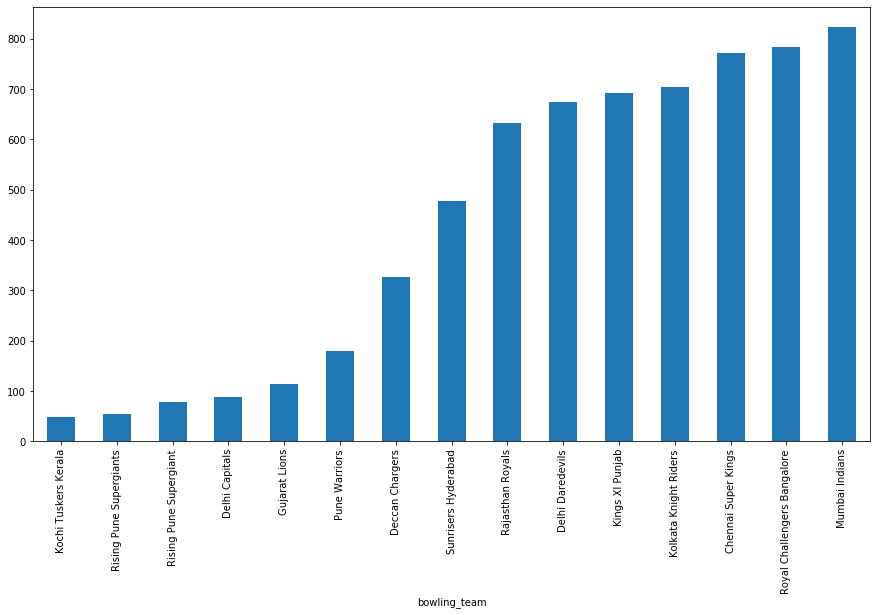

In [286]:
#max wicket get a team
wickets=df.dropna()
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
wickets.groupby(['bowling_team'])['player_dismissed'].count().sort_values().plot.bar(ax=ax)

Solution:

Maximum Run And Wicket get by the Mumbai Indians but its also gives max wide runs and some extra runs but it looks like a small price for a big win

The Royal Challengers Balnglore has the same but second position in the runs wicket and others

The chennai super kings gets 3 rank in getting wicket 5 ranks in gettings max run a the good performance by not giving the extra runs.

kokata night riders has 4 rank in getting wicket 4 rank in getting most ranks but they give much extra runs than chennai super kings.


These statistics show that these are the top four teams who have very good performance and always have high competition with each other to get the winner trophies 

The companines can pay them to endorse their product

In [ ]:
Thanku